# Nobel Prize Data Analysis

Let's analyze a dataset on the past winners of the Nobel Prize. By exploring the laureates and their histories, we'll uncover interesting patterns about the Nobel Prize and gain general insights about our world.

---

## Background: The Nobel Prize

On November 27, 1895, Alfred Nobel signed his last will in Paris, surprising society by leaving most of his fortune to establish a new prize. These prizes are now awarded annually to those who have benefitted humankind in the fields of **chemistry**, **literature**, **physics**, **physiology or medicine**, **economics**, and **peace**.

<img src=https://i.imgur.com/36pCx5Q.jpg>

---

## Project Objectives

In this project, you will:

- Explore and clean a Nobel Prize dataset.
- Visualize data with **Choropleth maps** using Plotly.
- Create various charts (bar charts, sunbursts, histograms, box plots) for insightful visualizations.
- Experiment with regression and categorical plots using Seaborn.
- Gain skills in filtering, manipulating, and interpreting real-world data.

We will begin by loading and exploring the dataset.

---
## Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

## Notebook Presentation

For better readability, floating-point numbers will be displayed with two decimals. To support advanced time series plotting, matplotlib converters are registered.

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Explore and Clean the Dataset
You will load, explore and clean the data for further visualization.\
You'll tackle the following challenges step-by-step.
## Read the Data

In [3]:
df_data = pd.read_csv('nobel_prize_data.csv')

Caveats: The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown. I've substituted them with mid-year estimate of July 2nd. 

---

## Challenge 1: Preliminary Data Exploration

- **Inspect the structure of the dataset**
- **Find the first and last years represented**
- **Understand the type of information in each column**
- In which year was the Nobel prize first awarded?
- Which year is the latest year included in the dataset?

In [4]:
# The shape of the data
df_data.shape

(962, 16)

In [5]:
# lets view top 5 rows
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [6]:
# Last five rows
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


In [7]:
# Check the information like data type etc
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

## Challenge 2: Duplicates and Null Values

- **Check for duplicate rows**
- **Check for NaN values**
- **Investigate which columns have NaN and why**

In [8]:
# Check for any duplicate values
df_data.duplicated().values.any()

np.False_

In [9]:
# Check for NaN values
df_data.isna().values.any()

np.True_

In [10]:
# Since there is nan values we can check all
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

**Why do these columns have NaN values?**
- **motivation**: About 88 laureates lack motivation text, possibly because detailed citations weren’t recorded.
- **birth_date**: Many birth dates are missing due to unknown or unrecorded birth information.
- **birth_city**: Some birthplaces might be unknown or lost over time.
- **birth_country**: Historical changes mean some countries no longer exist by their original name.
- **sex**: Some laureates might not have declared their gender.
- **organization_name, organization_city, organization_country**: About 255 laureates worked independently or had no affiliation with an organization.
- **ISO**: Missing for similar reasons as birth_country, especially for historic or changed countries.


In [11]:
# Examine rows where 'birth_date' is missing
col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna(), col_subset].head()

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN


That makes sense. We also see that since the organisation's name is in the full_name column, the organisation_name column contains NaN.

In addition, when we look at for rows where the organization_name column has no value, we also see that many prizes went to people who were not affiliated with a university or research institute. This includes many of the Literature and Peace prize winners.

In [12]:
# Examine rows where 'organization_name' is missing
col_subset = ['year', 'category', 'laureate_type', 'full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna(), col_subset].head()

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN


## Challenge 3: Type Conversions and Feature Engineering

- **Convert `birth_date` to a datetime object**
- **Add a `share_pct` column (prize share as a percentage)**,  which has the laureates' share as a percentage in the form of a floating-point number.

In [13]:
df_data['birth_date'] = pd.to_datetime(df_data.birth_date)

In [14]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA


In [15]:
# lets convert the prize_share into percentage
share_pct = df_data['prize_share'].str.replace('1/', "")

df_data['share_pct'] = 1 / pd.to_numeric(share_pct) 

In [16]:
# Now we should validate whether the new columns look correct.
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


# Plotly Bar & Donut Charts: Analyse Prize Categories & Women Winning Prizes

Data science often starts with questions. Asking good, creative questions drives exploration and discovery. Sometimes the data won’t have answers to all questions - and that’s part of the process.

---

## Challenge 1: Formulate Your Questions

Pause here and think about the dataset’s columns and types of information you have.  
Write down at least 3 questions you want to explore, for example:

- What percentage of Nobel laureates were women?  
- How many prizes have been given in each category?  
- Who were the first female Nobel laureates and what did they win for?

In [17]:
df_data[df_data.sex == 'Female'].shape

(58, 17)

In [18]:
df_data[['category', 'prize']].groupby('category').count()

,prize
category,
Chemistry,186
Economics,86
Literature,117
Medicine,222
Peace,135
Physics,216


In [19]:
df_data[df_data.sex == 'Female'].sort_values('year').head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00


we can see from above that:
- The first female Nobel laureates was Marie Curie
- And she won for Physics

---

## Challenge 2: Donut Chart of Prizes by Gender

Create a [**donut chart**](https://plotly.com/python/pie-charts/) using Plotly to show the proportion of Nobel prizes awarded to men versus women.  
What percentage of all prizes went to women?

In [20]:
prize_gender = df_data[['sex', 'prize']].groupby('sex').count()

In [21]:
fig = px.pie(prize_gender,
    values='prize', # Select the column from the dataframe
    title="Proportion of Nobel prizes awarded to men versus women from 1901 to 2020",
    names=prize_gender.index,
    hole=0.3,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.show()

We see that out of all Nobel laureates since 1901, only about **6.2%** were women.

---

## Challenge 3: First 3 Female Nobel Laureates

- Who were the first 3 women to win a Nobel Prize?  
- What did they win for?  
- In which countries were they born?  
- Were they part of an organization?

In [22]:
df_data[df_data.sex == "Female"].sort_values('year').head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


From we can conclude that:
>Top 3 women who won nobel prize are Marie Curie, Baroness Bertha and Selma Ottilia in the category of Physics, Peace and Literature and they born in the country Russia, Austria and Sweden respectively. And they were not part of any organization.

## Challenge 4: Multiple Nobel Prize Winners

Did some people win a Nobel Prize multiple times? If so, who were they? 

In [23]:
df_data[['prize', 'full_name']].groupby('full_name').count().sort_values('prize', ascending=False).head(7)

,prize
full_name,
Comité international de la Croix Rouge (International Committee of the Red Cross),3
John Bardeen,2
Frederick Sanger,2
Linus Carl Pauling,2
"Marie Curie, née Sklodowska",2
Office of the United Nations High Commissioner for Refugees (UNHCR),2
Albert Abraham Michelson,1



- There are 6 laureates with more than one Nobel Prize.
- For example, Marie Curie won twice - once in Physics, once in Chemistry.
- The International Red Cross received the Peace prize 3 times.

---

## Challenge 5: Prizes Awarded per Category
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Use the color scale called `Aggrnyl` to colour the chart, but don't show a color axis.
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [24]:
category_prize = df_data[['prize', 'category']].groupby('category').count()
category_prize

,prize
category,
Chemistry,186
Economics,86
Literature,117
Medicine,222
Peace,135
Physics,216


In [25]:
fig = px.bar(
    data_frame=category_prize,
    x=category_prize.index,
    y='prize', # Select the column from the dataframe
    color_continuous_scale='Aggrnyl',
    color=category_prize.index,
    title="Total Nobel prize distributed in different categories from 1901 to 2020"  
)
fig.update_layout(
xaxis_title='Nobel Prize Category',
yaxis_title='Number of Prizes',
xaxis={'categoryorder':'total descending'},  # Sort in descending order
coloraxis_showscale=False
)
fig.show()

## Challenge 6: The Economics Prize
* When was the first prize in the field of Economics awarded?
* Who did the prize go to?

In [26]:
df_data[df_data.category == "Economics"].sort_values('year').head(1)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50



- The Economics prize is newer: first awarded in **1969** (vs. 1901 for Physics).
- This explains its smaller total number of laureates.

---

## Challenge 7: Gender Split by Category (Male and Female Winners by Category)
* Create a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart. How many prizes went to women in Literature compared to Physics?

<img src=https://i.imgur.com/od8TfOp.png width=650>

In [27]:
group_nobel = df_data[['prize', 'sex', 'category']].groupby(['category', 'sex'], as_index=False).count().sort_values('prize', ascending=False)
group_nobel

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90
3,Economics,Male,84
8,Peace,Female,17
4,Literature,Female,16
6,Medicine,Female,12
0,Chemistry,Female,7


In [28]:
# lets plot it
fig = px.bar(group_nobel,
             x='category',
             y='prize',
             color='sex',
             title="No of prizes Awarded per category Split by men and women")

fig.show()

# Visualizing Nobel Prize Trends Over Time with Matplotlib

Now let's explore how Nobel Prize awards have changed over time. We'll use Matplotlib for time series plots and NumPy to help with axis ticks. These analyses will help us spot patterns-such as effects from global events and changes in prize sharing.

---

## Challenge 1: Are More Prizes Awarded Recently?

**Tasks:** Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually. 
* Count the number of prizes awarded every year. 
* Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy). 

<img src=https://i.imgur.com/4jqYuWC.png width=650>

* Use the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 

<img src=https://i.imgur.com/u3RlcJn.png width=350>

* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?

In [29]:
year_group = df_data[['year', 'prize']].groupby('year', as_index=False).count()

In [30]:
roll_year_group = year_group.rolling(window=6).mean()

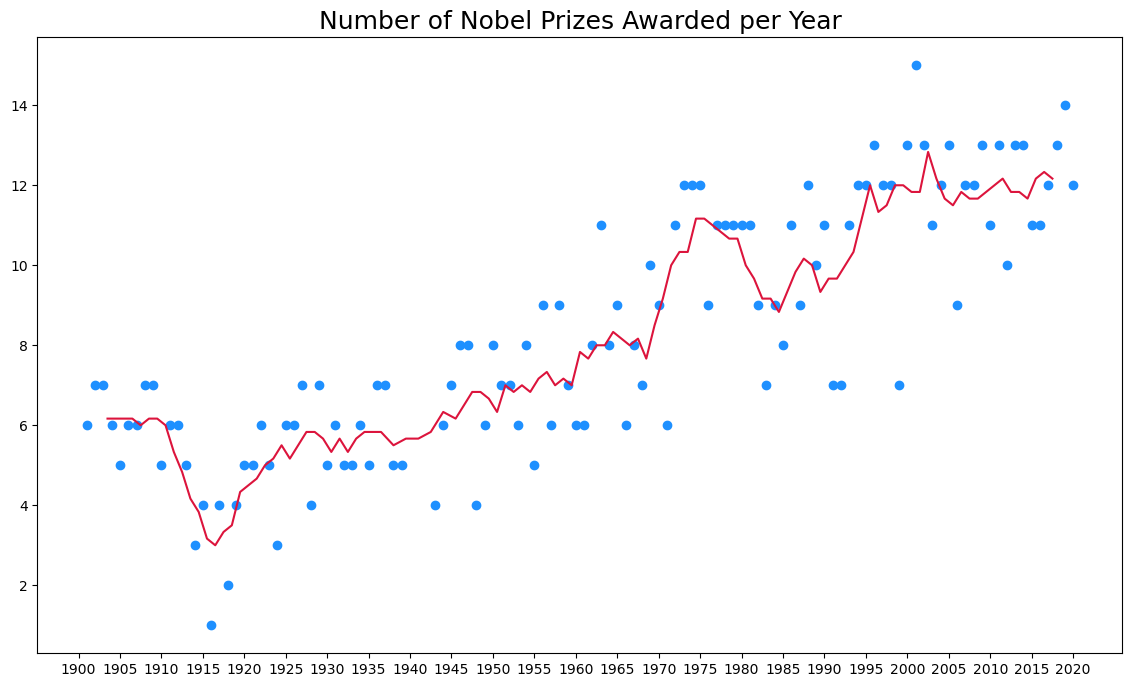

In [31]:
# Lets plot by super impose two graphs
plt.figure(figsize=(14, 8))
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.scatter(year_group.year, year_group.prize, c='#1e90ff')   # c='dodgerblue'
plt.plot(roll_year_group.year, roll_year_group.prize, c='#DC143C')
plt.xticks(np.arange(1900, 2021, 5))   # Add the ticks each 5 year
plt.show()

**Explanation:**  
This chart shows the number of prizes awarded per year and highlights the smoothed trend. Notice the dips during World War I and II-fewer awards were given. After the 1960s, especially from 1969 onward, there’s an uptick due to the Economics prize being added.

---

## Challenge 2: Are More Prizes Shared Nowadays?

**Tasks:** Investigate if more prizes are shared than before. 

* Calculate the average prize share of the winners on a year by year basis.
* Calculate the 5 year rolling average of the percentage share.
* Copy-paste the cell from the chart you created above.
* Modify the code to add a secondary axis to your Matplotlib chart.
* Plot the rolling average of the prize share on this chart. 
* See if you can invert the secondary y-axis to make the relationship even more clear. 

In [32]:
pct_group = df_data[['share_pct', 'year']].groupby('year', as_index=False).mean()
roll_pct_group = pct_group.rolling(window=5).mean()  # 5 window rolling 

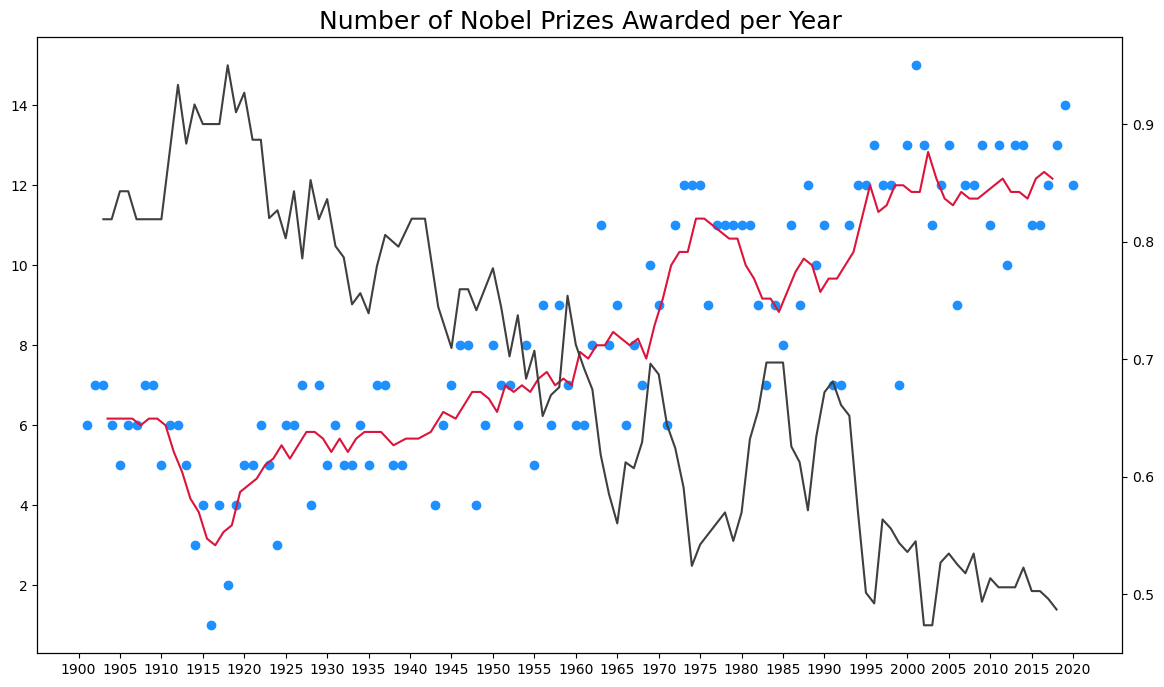

In [33]:
# Lets plot by super impose two graphs
plt.figure(figsize=(14, 8))

plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.scatter(year_group.year, year_group.prize, c='#1e90ff')   # c='dodgerblue'
plt.plot(roll_year_group.year, roll_year_group.prize, c='#DC143C')
ax2 = plt.gca().twinx()
ax2.plot(roll_pct_group.year, roll_pct_group.share_pct, c='#403E3E')
plt.xticks(np.arange(1900, 2021, 5))   # Add the ticks each 5 year
plt.show()

Also we can write it more cleanly.\
To see the relationship between the number of prizes and the laureate share even more clearly we can invert the second y-axis.

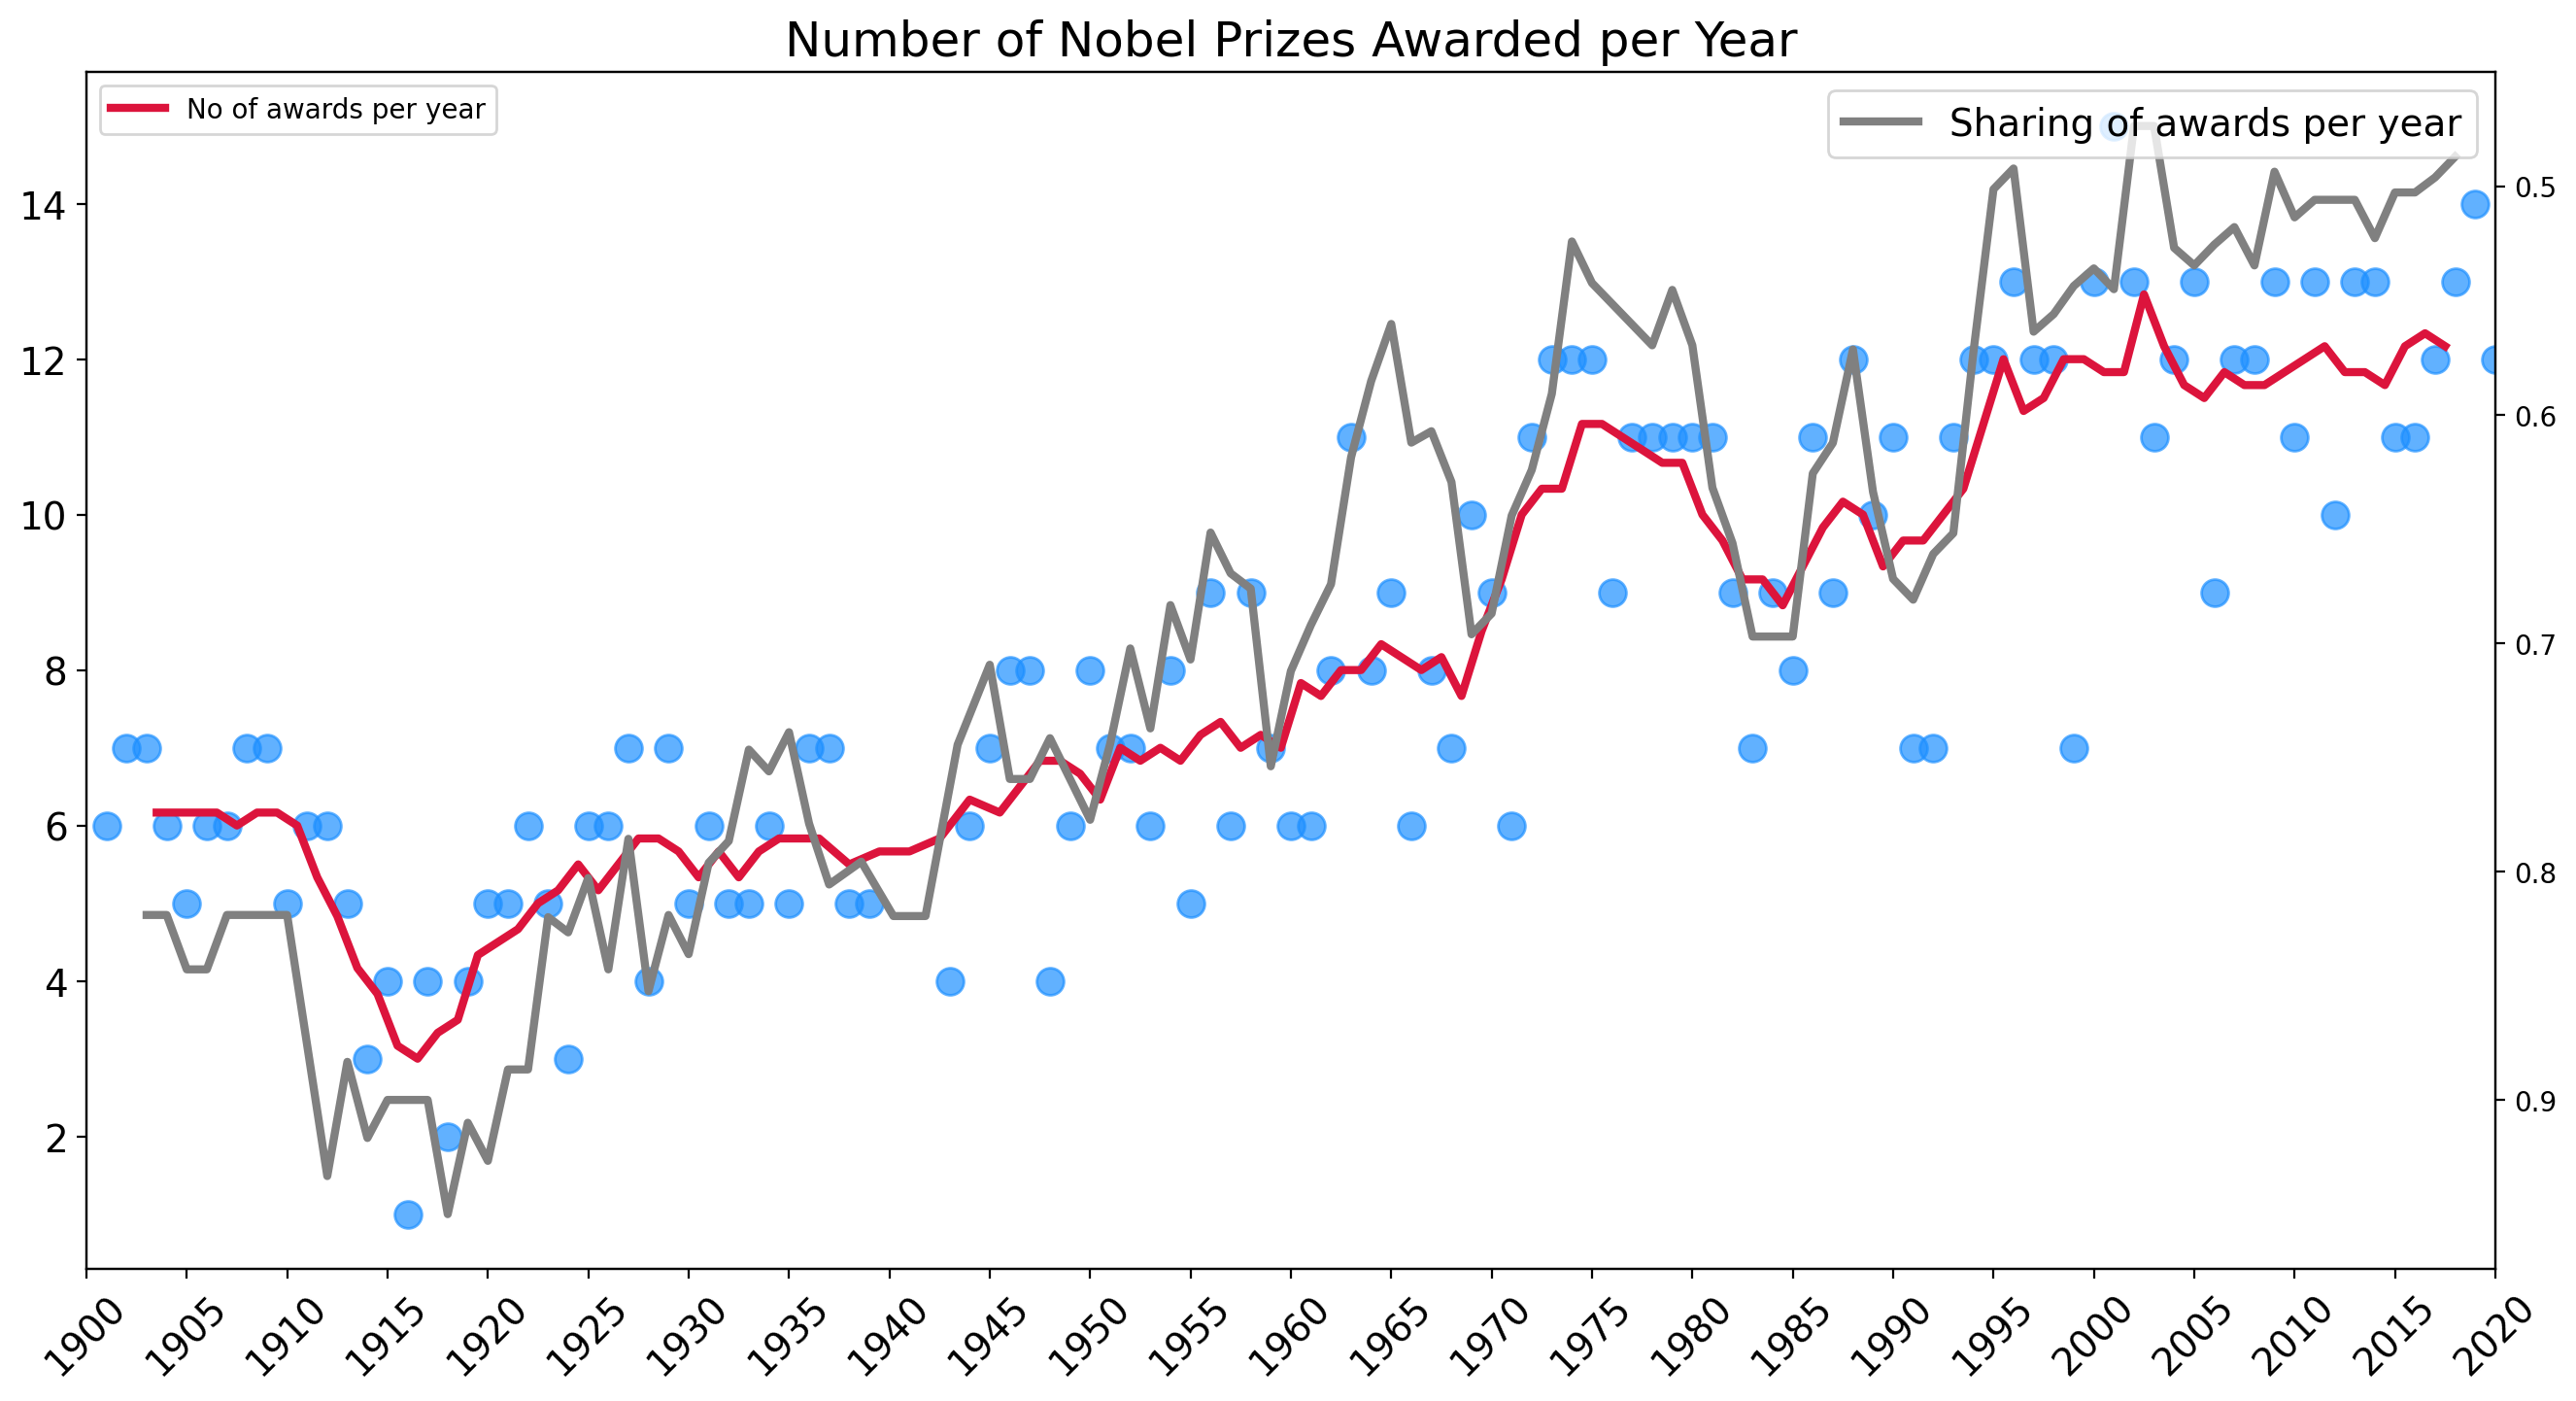

In [34]:
ticks_5yr = np.arange(1900, 2021, 5)

plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=ticks_5yr, fontsize=14, rotation=45)

# Main axis for prize counts
ax1 = plt.gca()
ax2 = ax1.twinx()  # Secondary axis for prize share

ax1.set_xlim(1900, 2020)

# Scatter and line for number of prizes
ax1.scatter(year_group.year, year_group.prize, 
            c='dodgerblue', alpha=0.7, s=100)
ax1.plot(roll_year_group.year, roll_year_group.prize, label="No of awards per year",
         c='crimson', linewidth=3)
ax1.legend()
# Line for rolling average of prize share (grey)
ax2.plot(roll_pct_group.year, roll_pct_group.share_pct, label="Sharing of awards per year",
         c='grey', linewidth=3)

# Optionally invert second axis for better comparison
ax2.invert_yaxis()
ax2.legend(loc='upper right', fontsize=14)
plt.show()

**Explanation:**  
The secondary axis shows average prize share per year. An upward trend in number of prizes often corresponds to a **lower average prize share**, meaning more laureates are sharing each award. The inverted axis helps visualize this negative relationship.

- The number of prizes per year generally increases, especially after new prize categories were introduced.  
- Sharper dips are visible during periods of global turmoil, such as WWI and WWII.  
- More prizes are divided among multiple laureates, as seen from the declining average prize share (grey line).

---

# A Choropleth Map and the Countries with the Most Prizes
let's compare which countries have won the most Nobel Prizes, and explore the categories in which those prizes were awarded. It feels a bit like an Olympic medal tally!

---

## Challenge 1: Top 20 Country Ranking
* Create a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 

<img src=https://i.imgur.com/6HM8rfB.png width=350>

* Is it best to use `birth_country`, `birth_country_current` or `organization_country`? 
* What are some potential problems when using `birth_country` or any of the others? Which column is the least problematic? 
* Then use plotly to create a **horizontal bar chart** chart showing the number of prizes won by each country. Here's what you're after:

<img src=https://i.imgur.com/agcJdRS.png width=750>

* What is the ranking for the top 20 countries in terms of the number of prizes?

In [35]:
top20_countries = df_data[['birth_country_current', 'prize']].groupby('birth_country_current', as_index=False).count().sort_values('prize', ascending=False).head(20)
top20_countries.head()

,birth_country_current,prize
74,United States of America,281
73,United Kingdom,105
26,Germany,84
25,France,57
67,Sweden,29


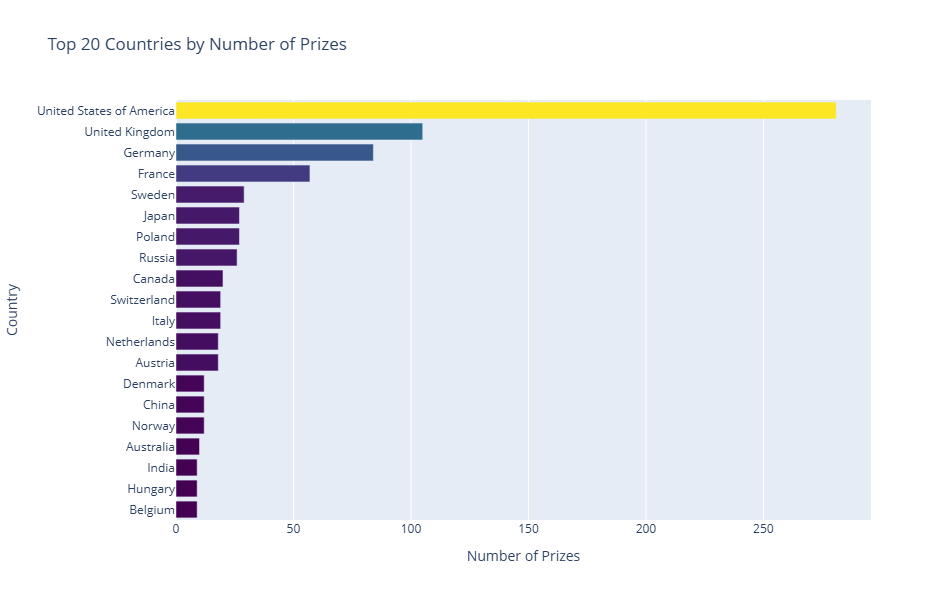

In [36]:
# lets do bar plot 
bar = px.bar(
    data_frame=top20_countries,
    x='prize',
    y='birth_country_current',
    color='prize',
    color_continuous_scale='Viridis',
    height=600,
    title='Top 20 Countries by Number of Prizes'

)
bar.update_layout(
    xaxis_title='Number of Prizes',
    yaxis_title='Country',
    coloraxis_showscale=False,
    yaxis={'categoryorder':'total ascending'},  # sort the bars
)
bar.show()

**Notes:**  
- Using `birth_country_current` is best because it uses modern country names, avoiding outdated or dissolved countries like the Soviet Union.  
- Some laureates may have been born abroad or changed nationality, so assumptions are needed.  
- The U.S. leads by a large margin, with the UK and Germany following.

---

## Challenge 2: Choropleth Map

* Create this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/) showing the total prizes per country:

<img src=https://i.imgur.com/s4lqYZH.png>

* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 

Hint: You'll need to use a 3 letter country code for each country. 

In [37]:
country_iso = df_data.groupby(['ISO','birth_country_current'],
                              as_index=False
                             ).agg({'prize': 'count'}).sort_values('prize', ascending=False).head(20)
country_iso.head()

,ISO,birth_country_current,prize
73,USA,United States of America,281
28,GBR,United Kingdom,105
19,DEU,Germany,84
27,FRA,France,57
68,SWE,Sweden,29


In [ ]:
# # lets plot it the map using our own geojson
import json
with open("thegeo.json") as f:
    geojson = json.load(f)

fig = px.choropleth(country_iso,
                    geojson=geojson,
                    locations="ISO",
                    color="prize", # lifeExp is a column of gapminder
                    hover_name="birth_country_current", # column to add to hover information
                    featureidkey="properties.ISO3166-1-Alpha-3",
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(margin={"r": 0, "t": 0, "l": 10, "b": 0})
fig.show()

<img src=choropleth.png>

I have replace the output of the above cell with the you can re-run the cell to view.
> You can Plotly built-in geojson
```python
fig = px.choropleth(country_iso, locations="ISO",
                    color="prize", # lifeExp is a column of gapminder
                    hover_name="birth_country_current", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
```

## Challenge 3: Country Bar Chart by Prize Category
See if you can divide up the plotly bar chart you created above to show the which categories made up the total number of prizes. Here's what you're aiming for:

<img src=https://i.imgur.com/iGaIKCL.png>

* In which category are Germany and Japan the weakest compared to the United States?
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?


The hard part is preparing the data for this chart! 


*Hint*: Take a two-step approach. The first step is grouping the data by country and category. Then you can create a DataFrame that looks something like this:

<img src=https://i.imgur.com/VKjzKa1.png width=450>

In [39]:
cat_prize_df = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': 'count'})
cat_prize_df.rename(columns={'prize': 'cat_prize'}, inplace=True)

In [40]:
cat_prize_df.head()

,birth_country_current,category,cat_prize
0,Algeria,Literature,1
1,Algeria,Physics,1
2,Argentina,Medicine,2
3,Argentina,Peace,2
4,Australia,Chemistry,1


In [41]:
country_prize_df = df_data.groupby(['birth_country_current'], as_index=False).agg({'prize': 'count'})
country_prize_df.head()

,birth_country_current,prize
0,Algeria,2
1,Argentina,4
2,Australia,10
3,Austria,18
4,Azerbaijan,1


In [42]:
# lets merge both on country column
country_cat_prize_df = cat_prize_df.merge(country_prize_df, on='birth_country_current')

In [43]:
country_cat_prize_df.head()

,birth_country_current,category,cat_prize,prize
0,Algeria,Literature,1,2
1,Algeria,Physics,1,2
2,Argentina,Medicine,2,4
3,Argentina,Peace,2,4
4,Australia,Chemistry,1,10


In [44]:
countries = top20_countries.birth_country_current.values

In [45]:
# We need only top 20 country
country_cat_prize_df = country_cat_prize_df[country_cat_prize_df.birth_country_current.isin(countries)]

In [46]:
country_cat_prize_df.shape

(110, 4)

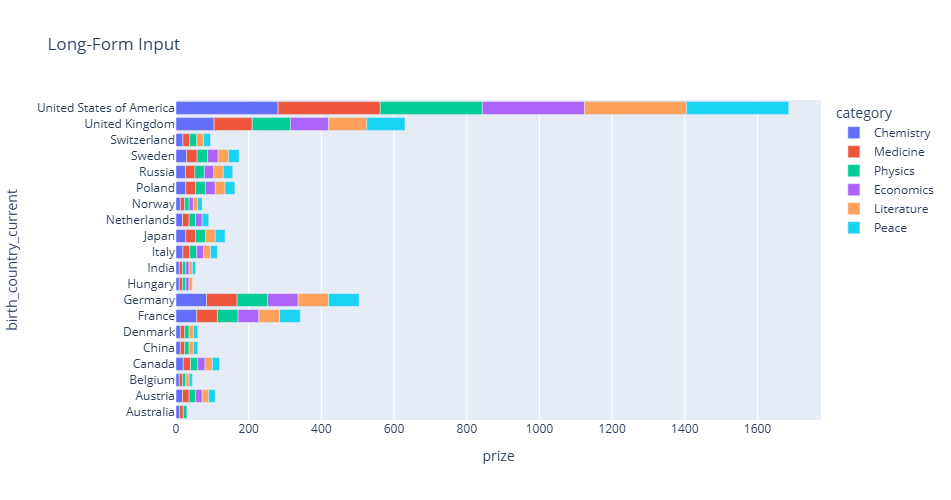

In [47]:
fig = px.bar(
    country_cat_prize_df,
    x="prize",
    y="birth_country_current",
    color="category",
    title="Long-Form Input",
height=500)
fig.show()

**Insights:**  
- The U.S. dominates in Economics and has more Physics and Medicine prizes than France has total.  
- Germany has more Physics prizes than the UK.  
- France leads Germany in Peace and Literature prizes.  
- Australia’s prizes mostly belong to a single category.  
- The Netherlands’ prizes are concentrated in half of the categories.

---

## Challenge 4: Prizes by Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculate the cumulative number of prizes won by each country in every year. Again, use the `birth_country_current` of the winner to calculate this. 
* Create a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [48]:
countries_time = df_data.groupby(['year', 'birth_country_current'], as_index=False).agg({'prize': 'count'})

In [49]:
countries_time.head()

,year,birth_country_current,prize
0,1901,France,2
1,1901,Germany,1
2,1901,Netherlands,1
3,1901,Poland,1
4,1901,Switzerland,1


In [50]:
countries

array(['United States of America', 'United Kingdom', 'Germany', 'France',
       'Sweden', 'Poland', 'Japan', 'Russia', 'Canada', 'Italy',
       'Switzerland', 'Austria', 'Netherlands', 'Norway', 'China',
       'Denmark', 'Australia', 'Belgium', 'Hungary', 'India'],
      dtype=object)

In [51]:
countries_time = countries_time.sort_values(["birth_country_current", "year"])
# Take only top 20 countries
top20_countries_time = countries_time[countries_time.birth_country_current.isin(countries)]
# Add cumulative prize column using groupby + cumsum
cum_prize = top20_countries_time.groupby("birth_country_current")["prize"].cumsum()
top20_countries_time.insert(3, "cum_prize", cum_prize)
top20_countries_time.head()

,year,birth_country_current,prize,cum_prize
67,1915,Australia,1,1
177,1945,Australia,1,2
248,1960,Australia,1,3
263,1963,Australia,1,4
270,1964,Australia,1,5


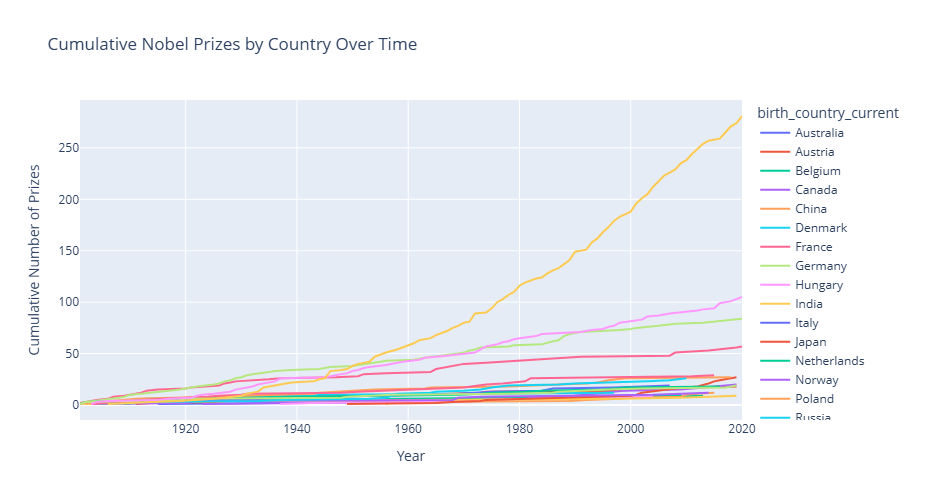

In [52]:
fig = px.line(
    top20_countries_time,
    x="year",
    y="cum_prize",
    color='birth_country_current',
    height=500,
    title='Cumulative Nobel Prizes by Country Over Time'
)

fig.update_layout(
xaxis_title='Year',
yaxis_title='Cumulative Number of Prizes'
)

fig.show()

**Observations:**  
- The U.S. surged after WWII, overtaking European countries.  
- Prior to WWII, Europe dominated Nobel prizes.  
- The UK and Germany traded positions multiple times in the late 20th century.  
- Sweden has consistently ranked around fifth, perhaps reflecting home bias.
***

# Sunburst Charts for a Detailed Regional Breakdown of Research Locations

Let's analyze where Nobel Prize-winning discoveries are actually made. We'll dig into organizations, cities, and birthplaces, then visualize these relationships with sunburst charts for a deeper regional breakdown.

## Challenge 1: Top Research Organisations

* Create a bar chart showing the organisations affiliated with the Nobel laureates. It should looks something like this:

<img src=https://i.imgur.com/zZihj2p.png width=600>

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [56]:
org_group = df_data.groupby('organization_name').agg({'prize': 'count'}).sort_values('prize').tail(20)
org_group.head()

,prize
organization_name,
Sorbonne University,7
Harvard Medical School,7
London University,7
University College London,7
Cornell University,8


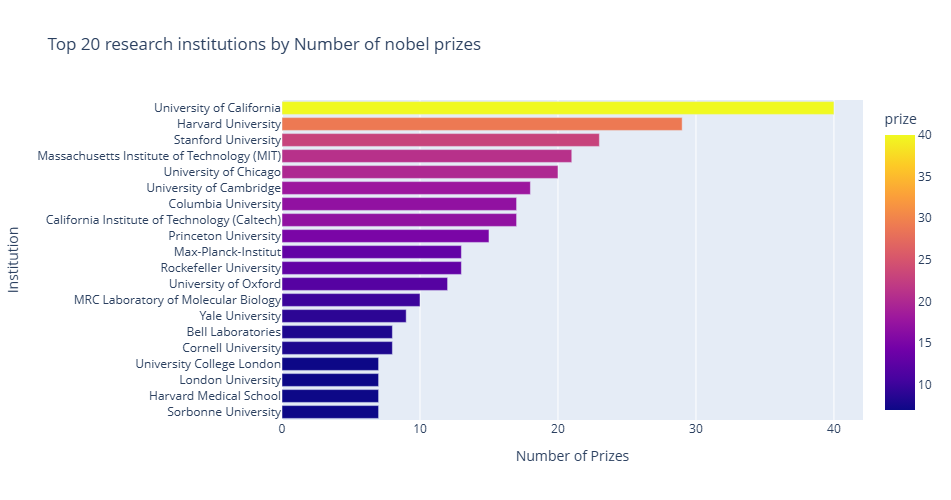

In [60]:
# Lets do bar plot
fig = px.bar(
    data_frame=org_group,
    x='prize',
    y=org_group.index,
    color='prize',
    title='Top 20 research institutions by Number of nobel prizes',
    height=500
)
fig.update_layout(
xaxis_title='Number of Prizes',
yaxis_title='Institution',
)
fig.show()

## Challenge 2: Top Organisation Cities

* Create another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [62]:
top20_org_city = df_data.groupby('organization_city').agg({'prize': 'count'}).sort_values('prize').tail(20)
top20_org_city.head()

,prize
organization_city,
"Ithaca, NY",8
Göttingen,8
Heidelberg,9
"Boston, MA",9
"New Haven, CT",9


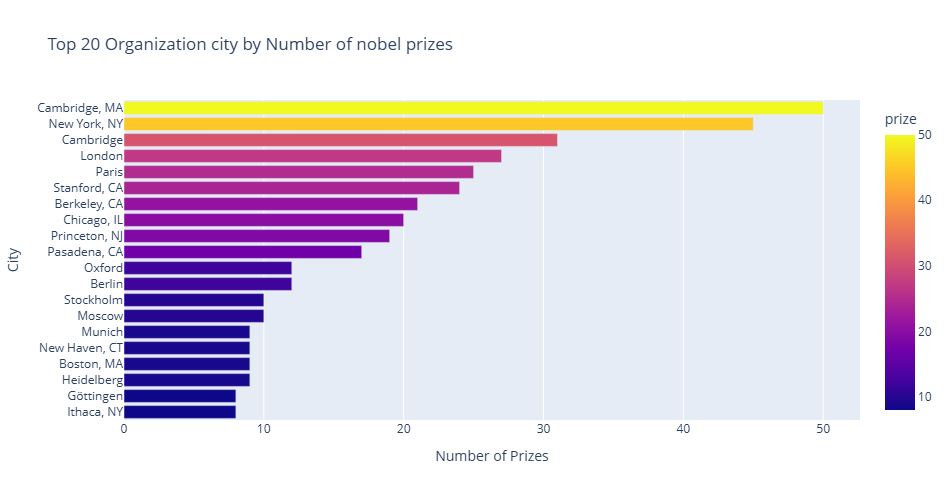

In [63]:
# Lets do bar plot
fig = px.bar(
    data_frame=top20_org_city,
    x='prize',
    y=top20_org_city.index,
    color='prize',
    title='Top 20 Organization city by Number of nobel prizes',
    height=500
)
fig.update_layout(
xaxis_title='Number of Prizes',
yaxis_title='City',
)
fig.show()

**Insights:**  
> Cambridge (Massachusetts) and New York are the leading hotspots in the U.S., while cities like Paris and London are central to European discoveries.

---

## Challenge 3: Laureate Birth Cities

* Does the ranking of laureate birthplaces match that of research locations?
* Are the most populous cities producing the most Nobel laureates?
* Create a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Use a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?

In [68]:
# the top 20 birth cities of Nobel laureates.
top20_birth_city = df_data.groupby('birth_city').agg({'prize': 'count'}).sort_values('prize').tail(20)
top20_birth_city.head()

,prize
birth_city,
Glasgow,3
Cairo,4
Montreal,4
"Pittsburgh, PA",4
Prague,5


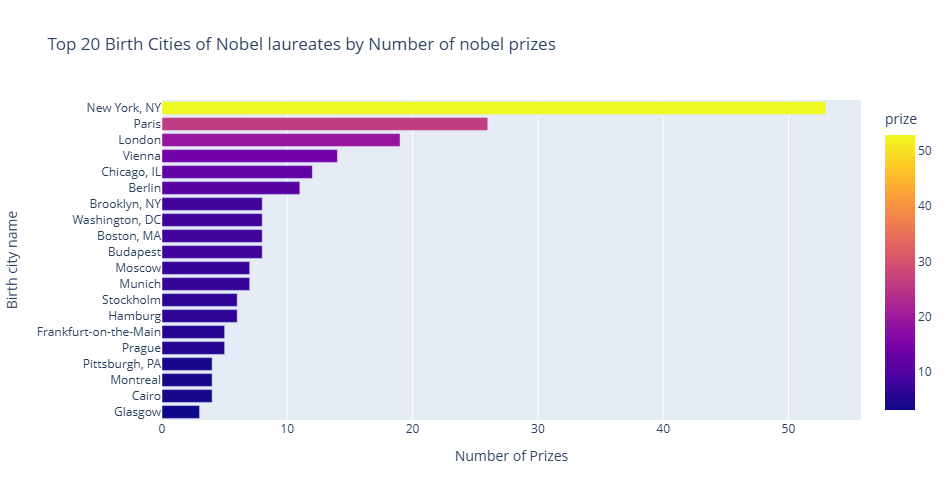

In [69]:
# Lets do bar plot
fig = px.bar(
    data_frame=top20_birth_city,
    x='prize',
    y=top20_birth_city.index,
    color='prize',
    title='Top 20 Birth Cities of Nobel laureates by Number of nobel prizes',
    height=500
)
fig.update_layout(
xaxis_title='Number of Prizes',
yaxis_title='Birth city name',
)
fig.show()

**Conclusion:**  
While population increases odds for Nobel births, some less populous cities (like Vienna, Budapest) also have significant impact. The research hotspot cities often differ from birth cities.

---

## Challenge 4: Sunburst Chart for Research Concentration

- Create a DataFrame grouping prizes by organization country, city, and institution. 
* Then use the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
- Notice how discoveries are concentrated in some European cities versus more distributed elsewhere.


Here's what you're aiming for:

<img src=https://i.imgur.com/cemX4m5.png width=300>

In [80]:
country_city_institution = df_data.groupby(["organization_country", "organization_city", "organization_name"], as_index=False).agg({'prize': 'count'})
country_city_institution.head()

,organization_country,organization_city,organization_name,prize
0,Argentina,Buenos Aires,Institute for Biochemical Research,1
1,Argentina,Buenos Aires,Instituto de Biologia y Medicina Experimental ...,1
2,Australia,Canberra,Australian National University,1
3,Australia,Melbourne,Walter and Eliza Hall Institute for Medical Re...,1
4,Australia,Nedlands,"NHMRC Helicobacter pylori Research Laboratory,...",1


In [83]:
burst = px.sunburst(
    data_frame=country_city_institution,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize',
    color='organization_country',
    height=500,
    title='Where do Discoveries Take Place?',
                   )
 
burst.update_layout(xaxis_title='Number of Prizes', 
                    yaxis_title='City',
                    coloraxis_showscale=False)
 
burst.show()

**Observations:**  
- In France, nearly all Nobel-affiliated organizations are in Paris.
- Scientific discoveries are widely distributed across many German cities.
- The UK’s activity clusters strongly around Cambridge and London.

***

# Patterns in the Laureate Age at the Time of the Award
How old are Nobel Prize winners when they’re recognized? Does age vary by category, and has it changed over time? This analysis explores age trends, differences by prize category, and changes through the decades.

**Challenge**: Calculate the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame.\
Hint: you can use [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html) to help you. 



In [88]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00


In [108]:
# Lets subtract birth year form winning date
df_data['winning_age'] = (pd.to_datetime(df_data.year, format='%Y') - 
                                        pd.to_datetime(df_data.birth_date, format='%Y')
                                       ).dt.days/365

In [109]:
df_data.head(2)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,48.37
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,61.84


### Who were the oldest and youngest winners?

**Challenge**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Use Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experiment with the number of `bins` to see how the visualisation changes.

In [111]:
# youngest winners
df_data.sort_values('winning_age').head(4)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,16.48
932,2018,Peace,The Nobel Peace Prize 2018,“for their efforts to end the use of sexual vi...,1/2,Individual,Nadia Murad,1993-07-02,Kojo,Iraq,Iraq,Female,NaN,NaN,NaN,IRQ,0.50,24.52
85,1915,Physics,The Nobel Prize in Physics 1915,"""for their services in the analysis of crystal...",1/2,Individual,William Lawrence Bragg,1890-03-31,Adelaide,Australia,Australia,Male,Victoria University,Manchester,United Kingdom,AUS,0.50,24.77
166,1932,Physics,The Nobel Prize in Physics 1932,"""for the creation of quantum mechanics, the ap...",1/1,Individual,Werner Karl Heisenberg,1901-12-05,Würzburg,Germany,Germany,Male,Leipzig University,Leipzig,Germany,DEU,1.00,30.09


In [125]:
# another method 
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,96.50


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,16.48


In [113]:
# average age of the winners
df_data['winning_age'].describe()

count   934.00
mean     59.48
std      12.62
min      16.48
25%      50.15
50%      59.80
75%      68.60
max      96.50
Name: winning_age, dtype: float64

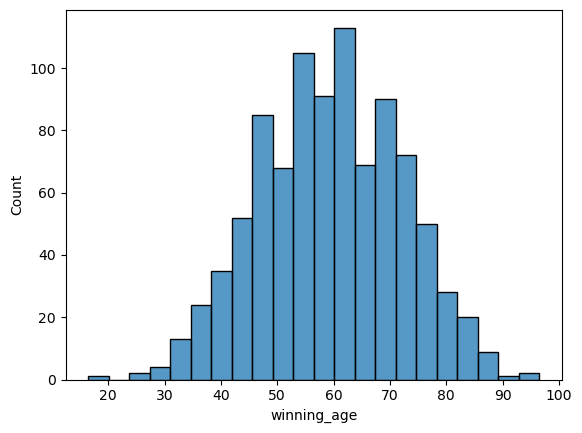

In [117]:
sns.histplot(data=df_data, x="winning_age")
plt.show()

### Descriptive Statistics for the Laureate Age at Time of Award

* Calculate the descriptive statistics for the age at the time of the award. 
* Then visualise the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experiment with the `bin` size. Try 10, 20, 30, and 50.  

In [118]:
df_data['winning_age'].describe()

count   934.00
mean     59.48
std      12.62
min      16.48
25%      50.15
50%      59.80
75%      68.60
max      96.50
Name: winning_age, dtype: float64

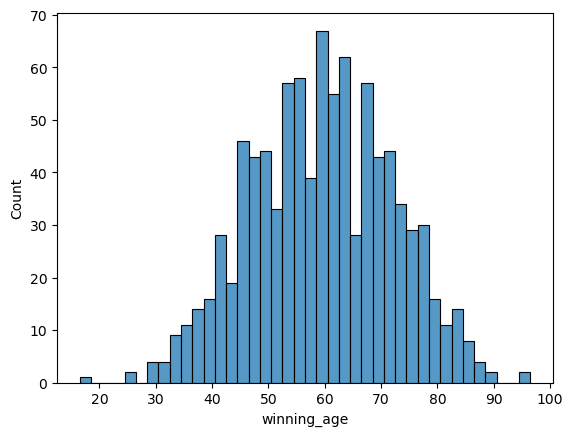

In [119]:
# try different bin size
sns.histplot(data=df_data, x="winning_age", bins=40)
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

**Challenge**

* Use Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Set the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


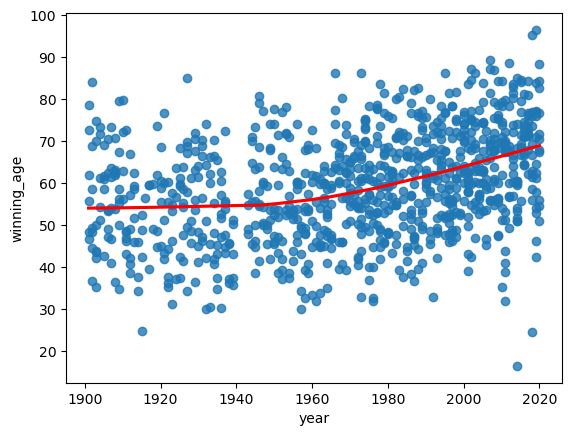

In [121]:
# Plot data and a linear regression model fit.
sns.regplot(data=df_data, x="year", y="winning_age", lowess=True, line_kws=dict(color="r"))
plt.show()

**Insights:**  
- From 1900–1940, the typical winning age hovered around 55.
- By 2020, it rose closer to 70, with greater spread in recent years.

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Use Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

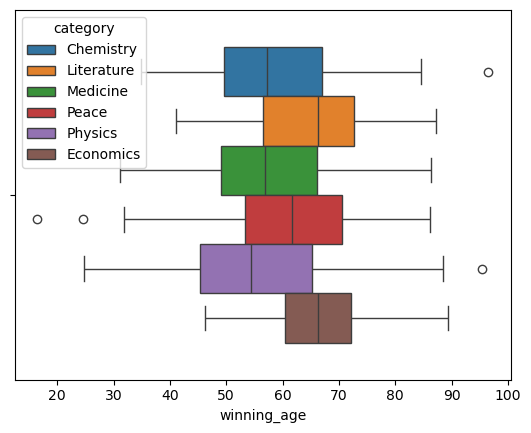

In [123]:
sns.boxplot(data=df_data, x="winning_age", hue='category')
plt.show()

**Interpretation:**  
- Literature Prize winners tend to be older.
- Physics/mathematics tend to have younger winners.
- "Whiskers" (spread of ages) are longest for Peace and Medicine.

---

### Age Trends by Category Over Time
* Now use Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. Again set `lowess` to `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Create another chart with Seaborn. This time use `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


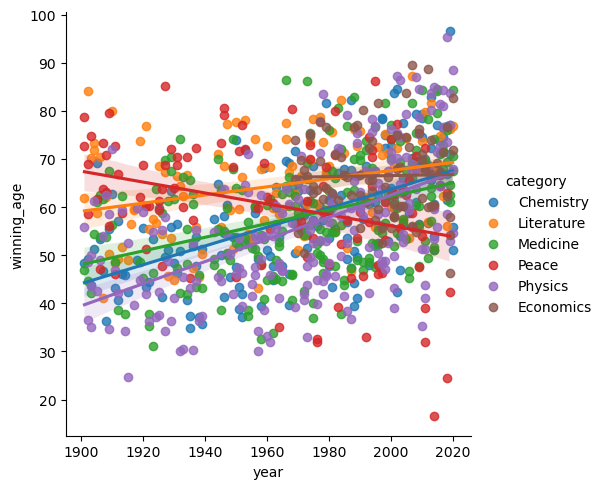

In [124]:
sns.lmplot(data=df_data, x="year", y="winning_age", hue="category")
plt.show()

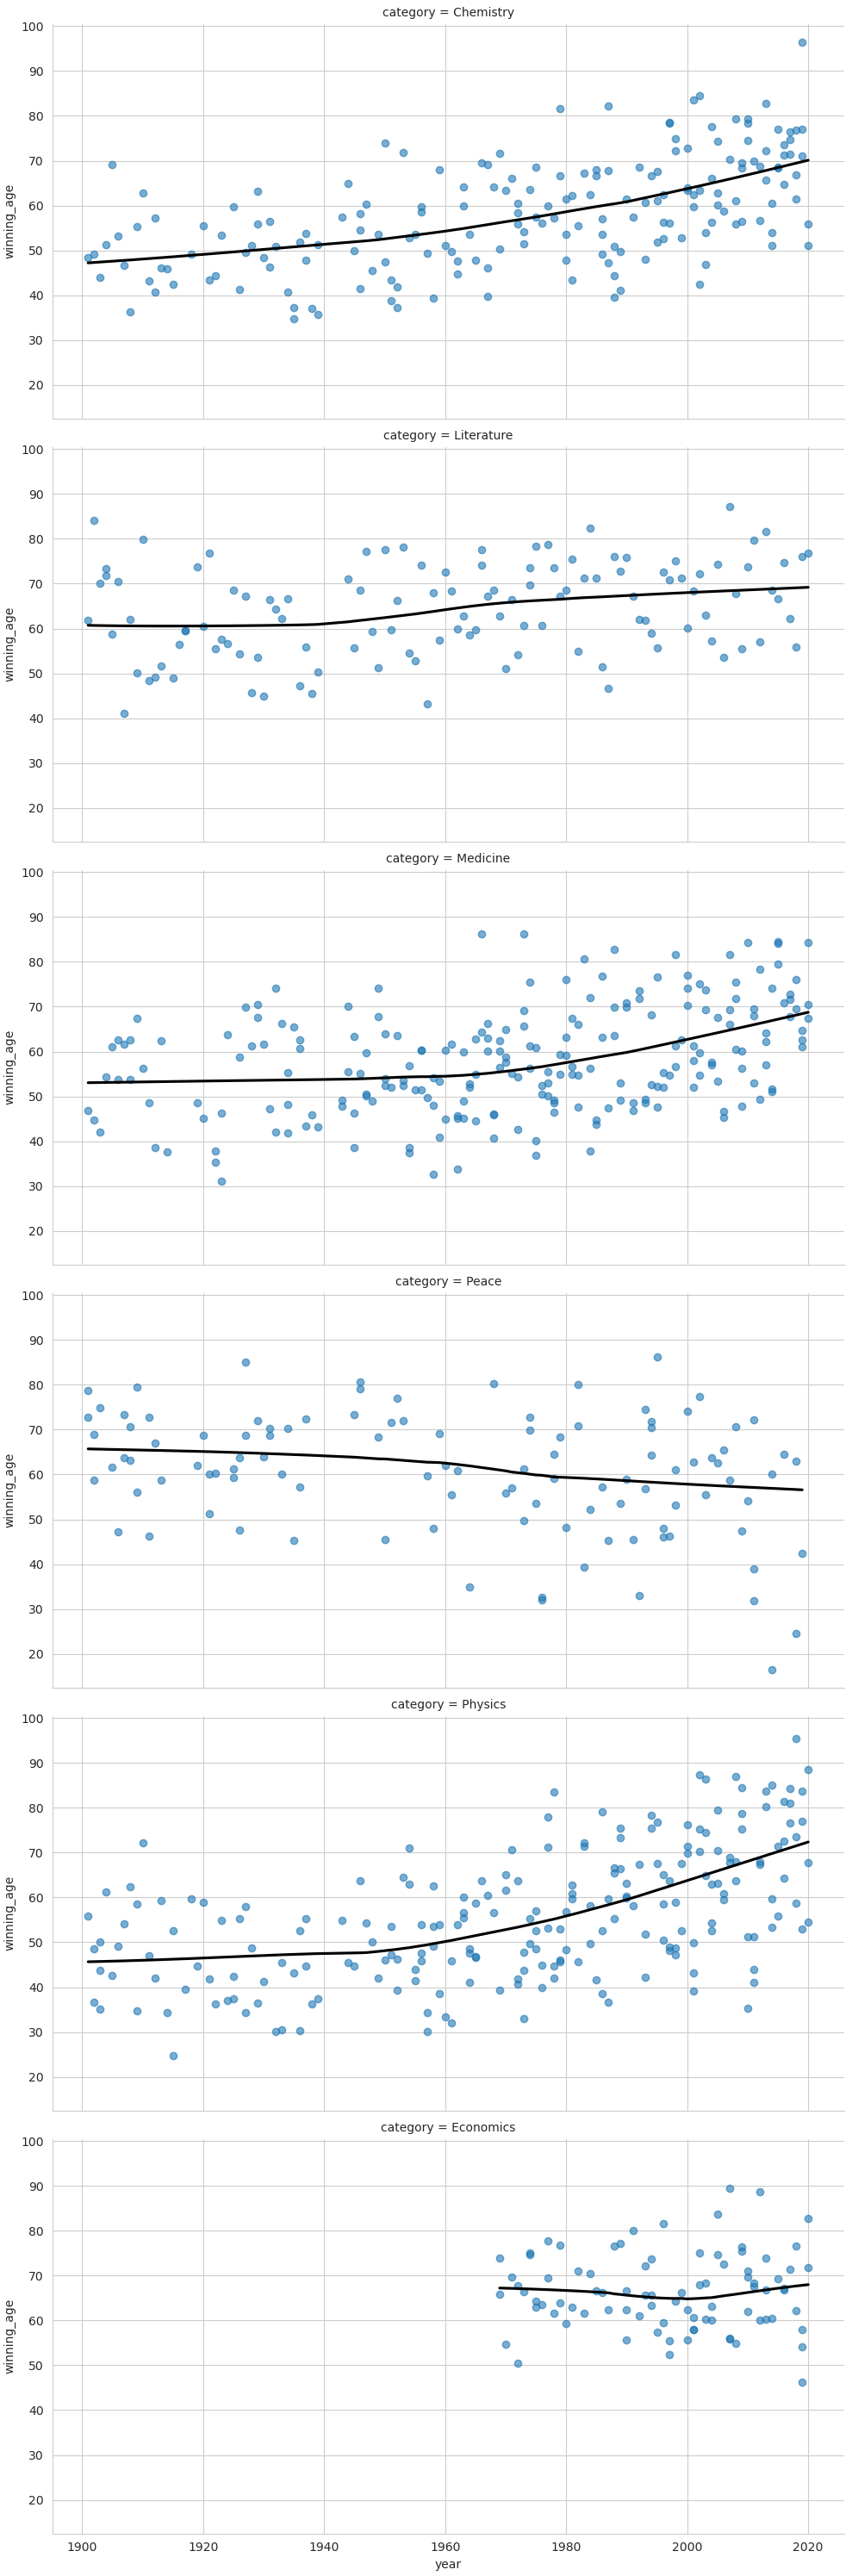

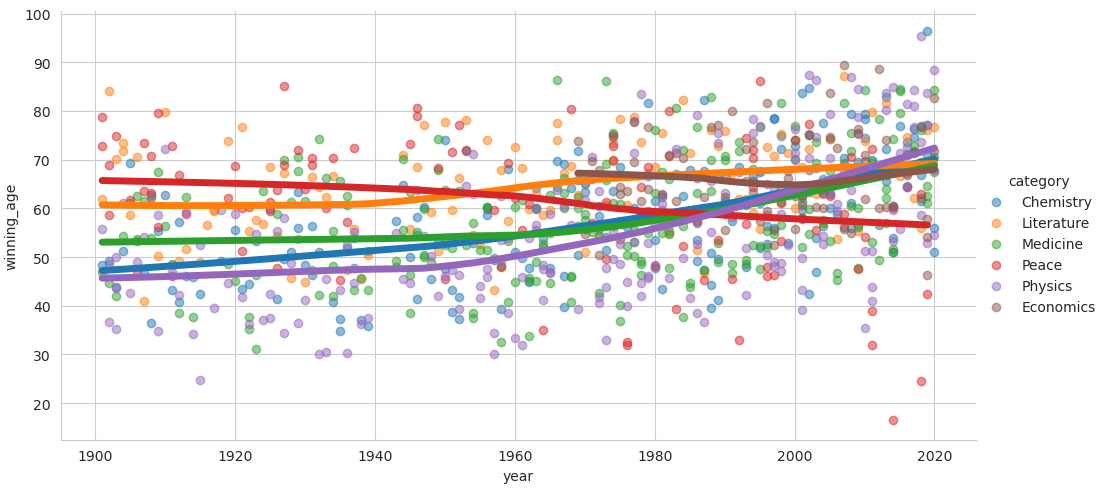

In [126]:
# we can write it more better way

# Age trend per category (separate rows)
with sns.axes_style('whitegrid'):
    sns.lmplot(
        data=df_data,
        x='year',
        y='winning_age',
        row='category',
        lowess=True,
        aspect=2,
        scatter_kws={'alpha':0.6},
        line_kws={'color':'black'}
    )
plt.show()

# All categories combined with hue
with sns.axes_style("whitegrid"):
    sns.lmplot(
        data=df_data,
        x='year',
        y='winning_age',
        hue='category',
        lowess=True,
        aspect=2,
        scatter_kws={'alpha':0.5},
        line_kws={'linewidth':5}
    )
plt.show()


**Findings:**  
- Physics, Chemistry, and Medicine laureates have grown older over time.
- Economics category shows stable ages.
- Peace Prize winners are trending younger recently.
- The box plot and regression plots can reveal different patterns!